![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [41]:
import pandas as pd
import numpy as np

In [42]:
df=pd.read_csv('hospitalizacion_modelado.csv')
df.head()

,fiebre_SI,itu_SI,tipoCultivo_HEMOCULTIVO,tipoCultivo_HEMOCULTIVO Y UROCULTIVO,tipoCultivo_UROCULTIVO,agenteAislado_E.COLI,agenteAislado_PSEUDOMONAS AERUGINOSA,"patronResistencia_ AMPI R, CIPRO R, GENTA R, SULFA M R",patronResistencia_MULTI SENSIBLE,"patronResistencia_RESISTENTE A AMPI, CIPRO Y GENTA","patronResistencia_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",hospitalizacion_SI
0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,1,0,0,0,0,0,1


Separen el dataset en X, y (variable objetivo)

In [43]:
# itero por las columnas y las stackeo
x=[]
for i in df:
    if (i!='hospitalizacion_SI'):
        x.append(np.array(df[i]).reshape(-1,1))

X_p=np.hstack(x)
y_p=np.array(df.hospitalizacion_SI).reshape(-1,1)



In [44]:
print(X_p.shape) # al parecer funciono

(523, 11)


In [45]:
# ahora hay que realizar el oversampling
# importo imbalanced-learn --> RandomUnderSampler: reduce la mayoria --> RandomOverSampler: amplia la minoria
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority')

X , y = ros.fit_resample(X_p,y_p)

In [46]:
# verificar el oversampling
print('value_counts y:',np.unique(y,return_counts=True))
print('len X:',len(X))

value_counts y: (array([0, 1]), array([500, 500]))
len X: 1000


Separen el dataset en X_train, X_test, y_train y y_test

In [47]:
# tomo datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.20,random_state=0)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [48]:
# instancio el modelo
from sklearn.tree import DecisionTreeClassifier

hosp_classifier=DecisionTreeClassifier(max_depth=2,criterion="entropy")

In [49]:
hosp_classifier.fit(X_Train,Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [50]:
print(hosp_classifier.classes_)
print(hosp_classifier.n_classes_)
print(hosp_classifier.max_features_)
print(hosp_classifier.feature_importances_)

[0 1]
2
11
[0.98839769 0.         0.         0.         0.         0.01160231
 0.         0.         0.         0.         0.        ]


In [51]:
Y_Pred = hosp_classifier.predict(X_Train)
Y_Test_Pred = hosp_classifier.predict(X_Test)

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [52]:
# con accuracy score
from sklearn.metrics import accuracy_score
print('score con datos de entrenamiento:',hosp_classifier.score(X_Train,Y_Train))
print('score con datos de prueba',hosp_classifier.score(X_Test,Y_Test))
print('accuracy score entrenamiento:',accuracy_score(Y_Train,Y_Pred))
print('accuracy score prueba:',accuracy_score(Y_Test,Y_Test_Pred))
# score es lo mismo que accuracy score

score con datos de entrenamiento: 0.9275
score con datos de prueba 0.915
accuracy score entrenamiento: 0.9275
accuracy score prueba: 0.915


In [53]:
# con precision score
from sklearn.metrics import precision_score

print('precision score entrenamiento:',precision_score(Y_Train, Y_Pred, average= None)) 
print('precision score prueba:',precision_score(Y_Test, Y_Test_Pred, average= None)) 



precision score entrenamiento: [0.89655172 0.96438356]
precision score prueba: [0.87037037 0.9673913 ]


In [54]:
# con exhaustividad
from sklearn.metrics import recall_score

print('precision entrenamiento:',recall_score(Y_Train, Y_Pred, average= None)) 
print('precision prueba:',recall_score(Y_Test, Y_Test_Pred, average= None)) 


precision entrenamiento: [0.96774194 0.88664987]
precision prueba: [0.96907216 0.86407767]


In [55]:
# con f1 score
from sklearn.metrics import f1_score

print('f1 entrenamiento:',f1_score(Y_Train, Y_Pred, average= None))
print('f1 prueba:',f1_score(Y_Test, Y_Test_Pred, average= None))


f1 entrenamiento: [0.93078759 0.92388451]
f1 prueba: [0.91707317 0.91282051]


In [56]:
# reporte de clasificacion
from sklearn.metrics import classification_report

print('classification report entrenamiento')
print(classification_report(Y_Train,Y_Pred))

classification report entrenamiento
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       403
           1       0.96      0.89      0.92       397

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



In [57]:
print('classification report prueba')
print(classification_report(Y_Test,Y_Test_Pred))

classification report prueba
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        97
           1       0.97      0.86      0.91       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



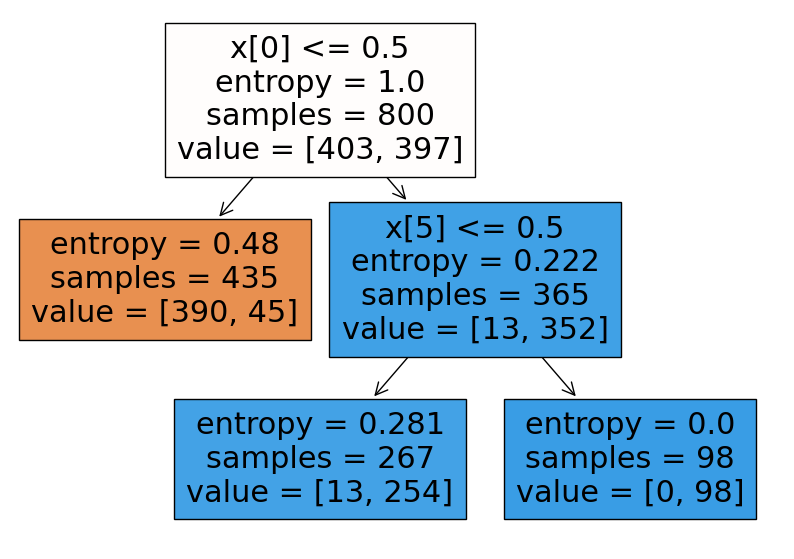

In [58]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (10,7))
tree.plot_tree(hosp_classifier, filled = True)
plt.show()

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [59]:
print('classification report entrenamiento')
print(classification_report(Y_Train,Y_Pred))

classification report entrenamiento
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       403
           1       0.96      0.89      0.92       397

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

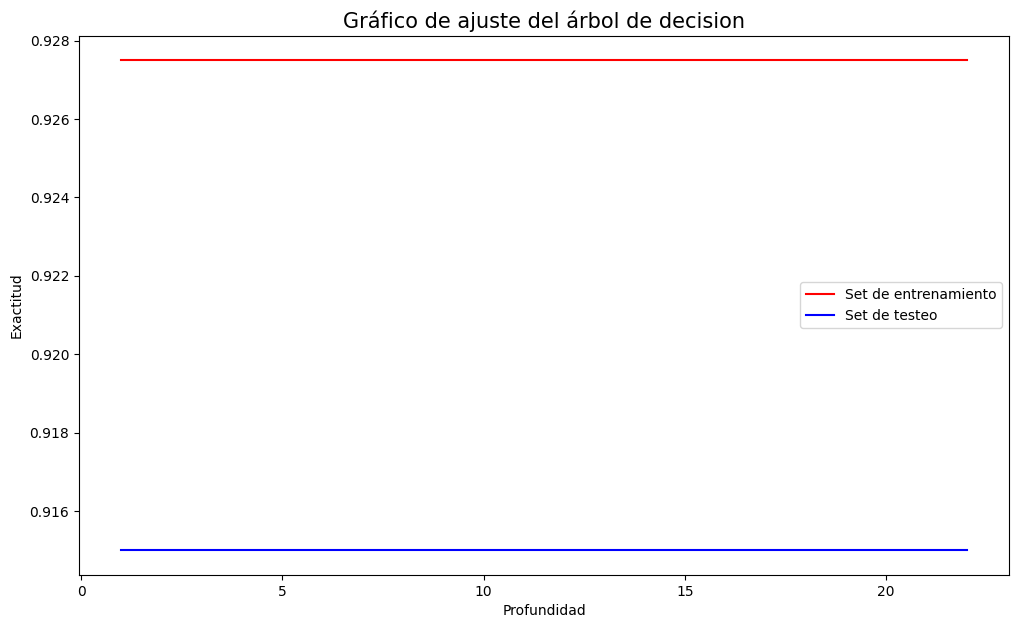

In [60]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_Train, Y_Train)
    train_prec.append(clf_3.score(X_Train, Y_Train))
    eval_prec.append(clf_3.score(X_Test, Y_Test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()


Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [61]:
from sklearn.neighbors import KNeighborsClassifier
hosp_classifier_kn = KNeighborsClassifier(n_neighbors=6)

In [62]:
hosp_classifier_kn.fit(X_Train,Y_Train)

KNeighborsClassifier(n_neighbors=6)

In [63]:
print(hosp_classifier_kn.classes_)

[0 1]


In [64]:
Y_Pred = hosp_classifier_kn.predict(X_Train)
Y_Test_Pred = hosp_classifier_kn.predict(X_Test)

Encuentre el valor óptimo para k

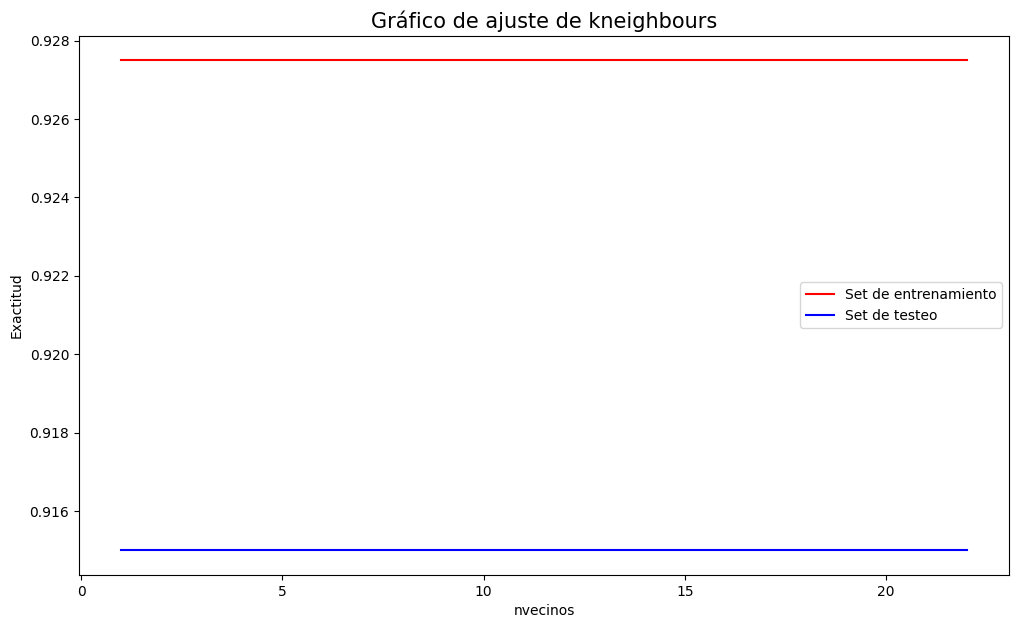

In [65]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 23))

for neigh in max_deep_list:
    clf_3 = KNeighborsClassifier(n_neighbors=neigh)
    clf_3.fit(X_Train, Y_Train)
    train_prec.append(clf_3.score(X_Train, Y_Train))
    eval_prec.append(clf_3.score(X_Test, Y_Test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de kneighbours', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('nvecinos')
plt.show()

In [66]:
# 1?

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [67]:
print('classification report entrenamiento')
print(classification_report(Y_Train,Y_Pred))

classification report entrenamiento
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       403
           1       0.96      0.89      0.92       397

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



In [68]:
# es casi lo mismo en este caso

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

In [69]:
# creo que mejoraria mucho el modelo añadiendo complejidad mediante variables explicativas de hospitalizacion. De todas formas creo que el modelo
# es bastante preciso dado que la fiebre y la presencia de infecciones en el tracto urinario son motivos de hospitalizacion, probablemente como con-
# secuencia/sintoma de la aparicion de complicaciones tras una biopsia de prostata

In [70]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score


def multiclass_roc_auc_score(Y_Test, Y_Pred, average= 'macro'):
    lb = LabelBinarizer()
    lb.fit(Y_Test)
    Y_Test = lb.transform(Y_Test)
    Y_Pred = lb.transform(Y_Pred)
    return roc_auc_score(Y_Test, Y_Pred, average=average)

In [71]:
print('El AUC-ROC multiclase:',multiclass_roc_auc_score(Y_Test, Y_Test_Pred)) # soy mejor que el oraculo de delphos?

El AUC-ROC multiclase: 0.9165749174256831


In [72]:
# ahora voy a usar gridsearch para determinar los mejores parametros
# primero con el arbol de decision

from sklearn.model_selection import GridSearchCV

arbol = DecisionTreeClassifier()

arbol_params = {'criterion':['gini','entropy','log_loss'],
                'splitter':['best','random'],
                'max_depth':[1,2,3,4,5,6,7,8,9],
                }

modelo_arbol = GridSearchCV(arbol,param_grid=arbol_params,cv=5)

In [73]:
modelo_arbol.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [74]:
modelo_arbol.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [75]:
Y_pred = modelo_arbol.predict(X_Train)

In [77]:
from sklearn.metrics import classification_report # vemos reporte de clasificacion
print(classification_report(Y_pred,Y_Train))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       435
           1       0.89      0.96      0.92       365

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



In [80]:
# pruebo con vecinos
kneighbors = KNeighborsClassifier()

kneighbors_params = {'n_neighbors':[1,2,3,4,5],
                     'weights':['uniform','distance'],
                     'algorithm':['auto','ball_tree','kd_tree','brute'],
                     'leaf_size':np.arange(start=0,stop=50)}

modelo_vecinos = GridSearchCV(kneighbors,param_grid=kneighbors_params,cv=5)

In [81]:
modelo_vecinos.fit(X,y)

/home/frangr94/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/frangr94/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/frangr94/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/home/frangr94/.local/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  F

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [82]:
modelo_vecinos.best_params_

{'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'}

In [83]:
Y_pred=modelo_vecinos.predict(X_Train)
print(classification_report(Y_pred,Y_Train))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       435
           1       0.89      0.96      0.92       365

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

